In [6]:
%run ../../Environment/environment.ipynb

Notebook ausgeführt


In [7]:
import numpy as np
import pandas as pd
import joblib
import random
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import CheckpointCallback
from sklearn.preprocessing import StandardScaler
from stable_baselines3.common.vec_env import DummyVecEnv

In [8]:
seed = 42
SEED  = seed % (2**32 - 1)
print(f"SEED: {SEED}")

SEED: 42


In [9]:
# -------------------------------
# CSV Datem einlesen
# -------------------------------
train_data = pd.read_csv("../../Transform_data/stand_data/2023-2018_stand_data.csv")
train_data.drop('datetime', axis=1, inplace=True)

test_data = pd.read_csv("../../Transform_data/stand_data/2025-2024_stand_data.csv")
test_data.drop('datetime', axis=1, inplace=True)

if(train_data is not None and test_data is not None):
    print("Daten erfolgreich eingelesen")

Daten erfolgreich eingelesen


In [14]:
# -------------------------------
# TradingEnv erstellen (bitte sicherstellen, dass TradingEnv importiert oder im gleichen Skript definiert ist)
# -------------------------------
env = TradingEnv(
    data=train_data,
    initial_cash=10_000,
    window_size=336,
    scaler_path="../../Transform_data/scaler.pkl",
    default_seed=SEED
)

if(env is not None):
    print("Environment created successfully")

Seed in the environment: 42
Environment created successfully


In [16]:
# -------------------------------
# DQN-Agenten initialisieren
# -------------------------------
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    seed=SEED,
    buffer_size=500_000  # set a smaller replay buffer size (50k transitions)
)

# -------------------------------
# Training
# -------------------------------
model.learn(
    total_timesteps=10000, 
    log_interval=1
)

# Speichere das trainierte Modell
model.save("ppo_trading_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Seed in the environment: 42


# Backtesting

Seed in the environment: 42


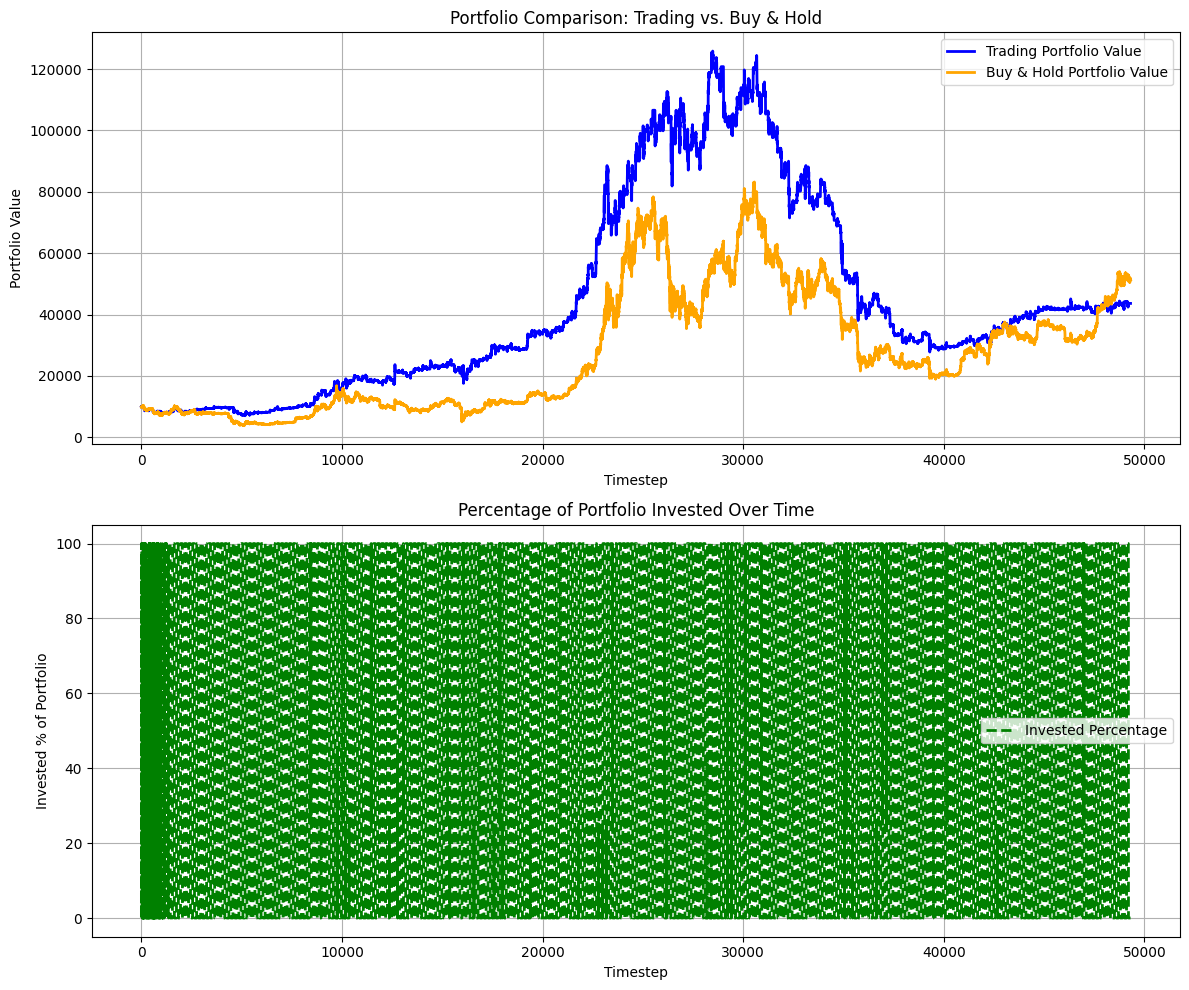

[0, 4, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 3, 3, 8, 8, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 1, 5, 8, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 1, 1, 3, 3, 8, 3, 7, 8, 8, 8, 8, 1, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 5, 3, 5, 2, 5, 5, 2, 2, 5, 5, 0, 3, 5, 2, 2, 5, 5, 3, 2, 2, 2, 5, 2, 2, 3, 3, 8, 3, 3, 3, 3, 3, 3, 8, 3, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 4, 3, 3, 6, 6, 6, 6, 2, 6, 6, 7, 7, 3, 3, 6, 6, 5, 6, 5, 3, 5, 2, 6, 6, 6, 6, 6, 5, 5, 4, 5, 6, 3, 5, 5, 1, 1, 1, 5, 5, 6, 1, 1, 8, 8, 8, 8, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 8, 8, 8, 8, 8, 5, 5, 5, 8, 5, 8, 8, 8, 8, 8, 8, 5, 8, 5, 5, 5, 8, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 8, 8, 8, 5, 0, 8, 8, 8, 0, 0, 0, 0, 8, 8, 0, 8, 8, 7, 5, 8, 8, 7, 5, 0, 0, 1, 1, 0, 0, 1, 1, 8, 0, 0, 8, 8, 8, 8, 5, 8, 3, 8, 1, 2, 8, 8, 8, 8, 8, 8, 8, 8, 3, 

In [12]:
# -------------------------------
# Testlauf: Den trainierten Agenten in einer Episode ausführen
# -------------------------------
training_env = env

obs, info = training_env.reset(seed=SEED)
done = False

# Liste der actionen
action_list = []

while not done:
    # Bestimme die Aktion (deterministisch)
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)  # oder: action = action.item()
    obs, reward, done, truncated, info = training_env.step(action)
    action_list.append(action)

# Hier wird der Zustand gerendert (z.B. als Plot). Du kannst den Render-Modus anpassen.
training_env.render(mode='human')
print(action_list)

Seed in the environment: 42
Seed in the environment: 42


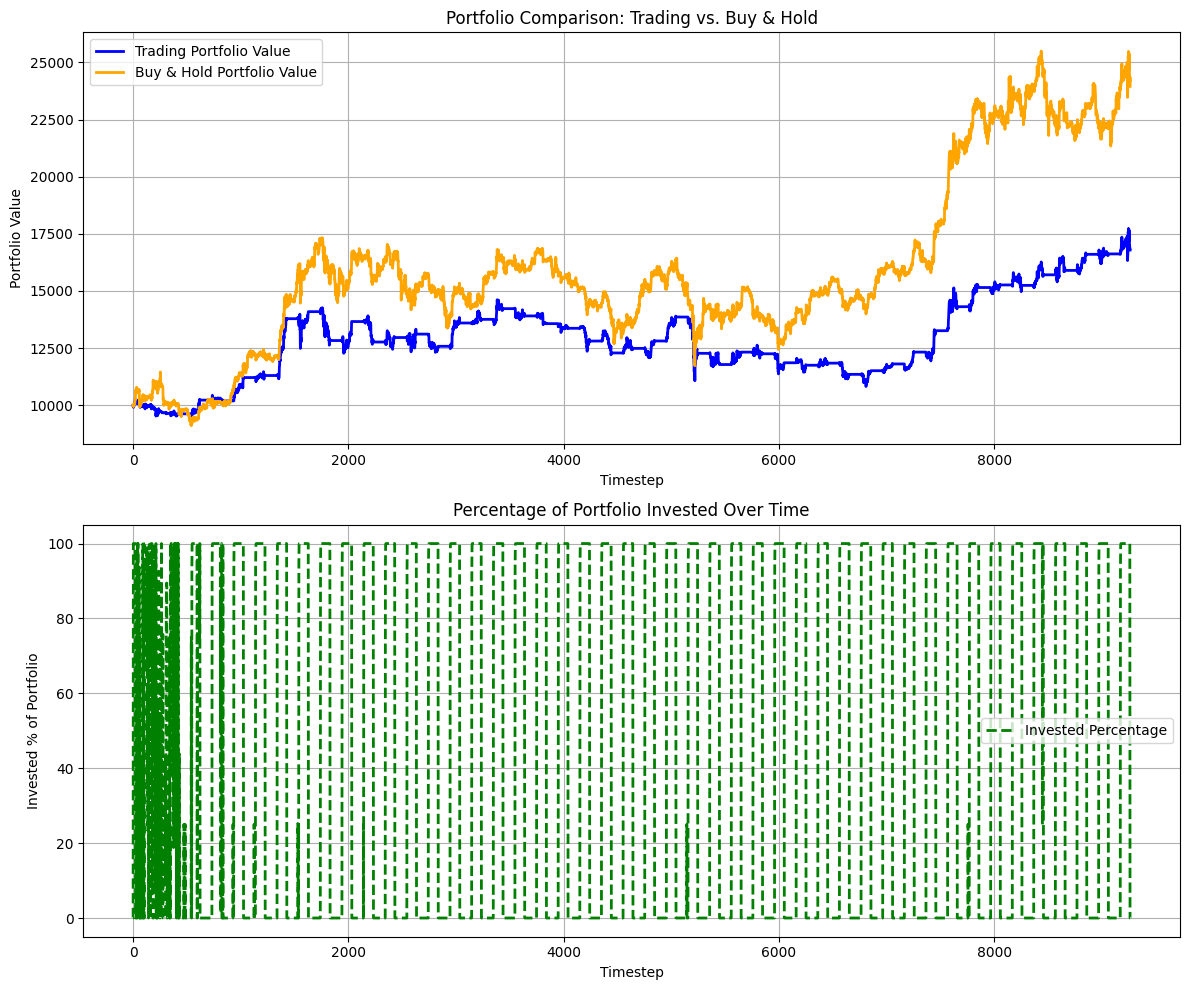

[0, 4, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 3, 3, 8, 8, 5, 5, 4, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 3, 3, 8, 8, 3, 5, 8, 8, 1, 1, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 2, 5, 3, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 3, 3, 5, 8, 2, 5, 2, 2, 3, 3, 3, 8, 3, 3, 5, 3, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 4, 3, 8, 6, 6, 8, 8, 8, 8, 6, 7, 3, 3, 3, 3, 1, 5, 2, 6, 3, 6, 2, 2, 5, 6, 6, 5, 5, 2, 5, 5, 4, 4, 5, 5, 8, 1, 0, 5, 1, 8, 8, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 8, 5, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 5, 8, 0, 0, 8, 8, 8, 5, 5, 8, 0, 1, 1, 7, 1, 1, 1, 2, 1, 1, 0, 0, 0, 8, 8, 0, 0, 1, 0, 0, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

In [13]:
# -------------------------------
# Testlauf: Den trainierten Agenten in einer Episode ausführen
# -------------------------------
test_env = TradingEnv(
    data=test_data,
    initial_cash=10_000,
    window_size=336,
    scaler_path="../../Transform_data/scaler.pkl",
    default_seed=SEED
)

obs, info = test_env.reset(seed=SEED)
done = False

# Liste der actionen
action_list = []

while not done:
    # Bestimme die Aktion (deterministisch)
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)  # oder: action = action.item()
    obs, reward, done, truncated, info = test_env.step(action)
    action_list.append(action)

# Hier wird der Zustand gerendert (z.B. als Plot). Du kannst den Render-Modus anpassen.
test_env.render(mode='human')
print(action_list)